In [17]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from src.llm_utils import regex_extraction

In [7]:
ground_truth_path = "data/TeleQnA.txt"
with open(ground_truth_path, encoding="utf-8") as f:
    loaded_json = f.read()
    ground_truth_qa = json.loads(loaded_json)

In [32]:
df_answer_sheet = pd.read_csv('output/phi2_answer_sheet_final.csv')
df_answer_sheet

,Question_ID,Answer_ID,Task
0,8138,-1,Phi-2
1,8153,2,Phi-2
2,8156,1,Phi-2
3,8160,3,Phi-2
4,8165,2,Phi-2
...,...,...,...
361,9974,3,Phi-2
362,9984,2,Phi-2
363,9986,2,Phi-2
364,9992,2,Phi-2


In [33]:
def apply_gt_answer(row):
    ground_truth_answer = ground_truth_qa[f"question {row['Question_ID']}"]['answer']
    pred_option = regex_extraction(ground_truth_answer, r"option (\d+):")
    return pred_option

def apply_gt_category(row):
    ground_truth_category = ground_truth_qa[f"question {row['Question_ID']}"]['category']
    return ground_truth_category

df_answer_sheet['Ground_truth_option'] = df_answer_sheet.apply(apply_gt_answer, axis=1)
df_answer_sheet['Ground_truth_category'] = df_answer_sheet.apply(apply_gt_category, axis=1)
df_answer_sheet

,Question_ID,Answer_ID,Task,Ground_truth_option,Ground_truth_category
0,8138,-1,Phi-2,3,Standards specifications
1,8153,2,Phi-2,5,Standards specifications
2,8156,1,Phi-2,3,Standards specifications
3,8160,3,Phi-2,3,Standards specifications
4,8165,2,Phi-2,4,Standards specifications
...,...,...,...,...,...
361,9974,3,Phi-2,3,Standards specifications
362,9984,2,Phi-2,2,Standards overview
363,9986,2,Phi-2,1,Standards specifications
364,9992,2,Phi-2,1,Standards specifications


## Accuracy

In [34]:
# calc accuracy and accuracy by category 
df_answer_sheet['Correct'] = df_answer_sheet['Ground_truth_option'] == df_answer_sheet['Answer_ID']
df_answer_sheet['Correct'].mean()

0.3114754098360656

## Accuracy by Category

In [36]:
acc_by_category = df_answer_sheet.groupby('Ground_truth_category')['Correct'].mean()
acc_by_category

Ground_truth_category
Standards overview          0.428571
Standards specifications    0.287129
Name: Correct, dtype: float64

Matplotlib is building the font cache; this may take a moment.


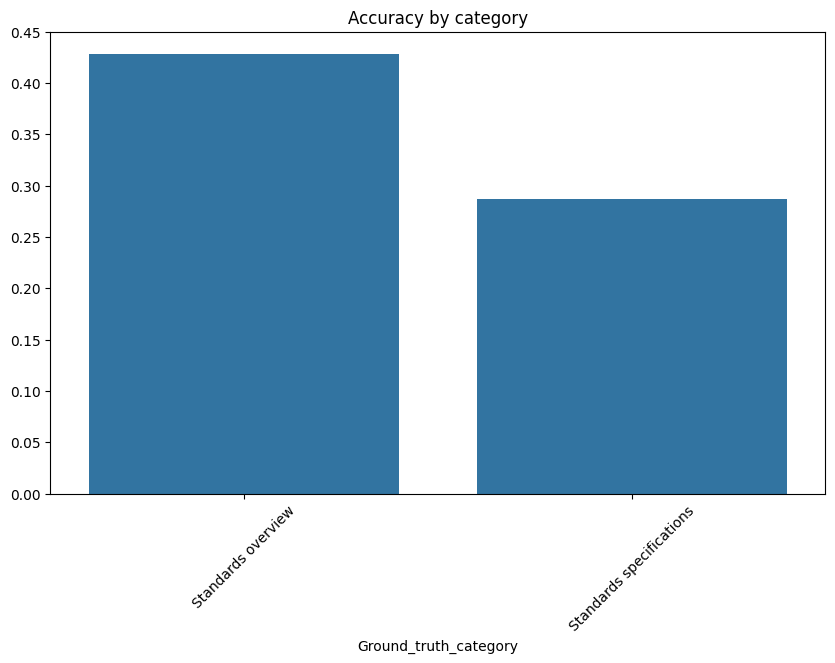

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x=acc_by_category.index, y=acc_by_category.values)
plt.xticks(rotation=45)
plt.title('Accuracy by category')
plt.show()
